# First quick analysis

Just to make sure that things make sense

In [43]:
import glob
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
data_path = './data/4_electrons_600pC_ch1_high_BW/C1_electrons_600pC_00020.txt'

In [22]:
header_len = 5
with open(data_path) as f:
    for k in range(header_len):
        print(f.readline())
    f.close()
print('--> Storing in vars from now on')
data = np.loadtxt(data_path, delimiter=' ', skiprows=header_len)

LECROYSDA18000 15238 Waveform

Segments 1 SegmentSize 12002

Segment TrigTime TimeSinceSegment1

#1 02-Nov-2018 10:51:12 0                 

Time Ampl

--> Storing in vars from now on


In [23]:
data = data.transpose()

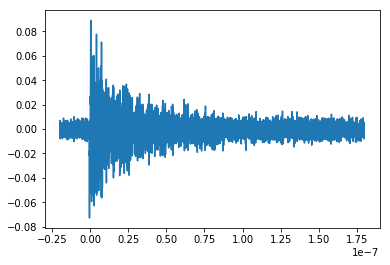

In [24]:
plt.plot(data[0], data[1])

In [26]:
data[0][1]-data[0][0]

1.666700000000246e-11

Text(0.5, 0, 'Frequency (GHz)')

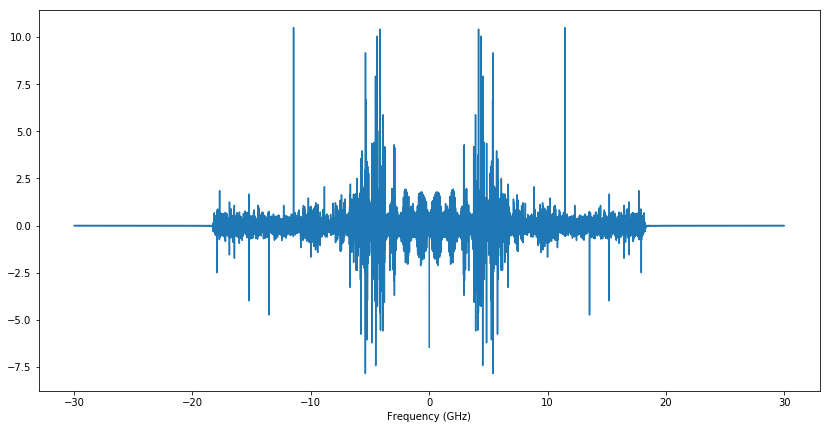

In [49]:
y_spectrum = fftpack.fft(data[1])
freqs = fftpack.fftfreq(data[1].size, d= data[0][1]-data[0][0])

fig, ax = plt.subplots(1, figsize=(14,7))
ax.plot(1e-9*freqs, y_spectrum,'-')
ax.set_xlabel('Frequency (GHz)')

# ax.set_xlim(0,20)

Cutoff freq = 9.998133648390379 GHz


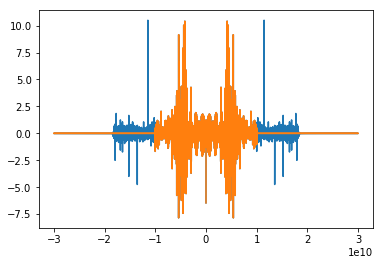

In [94]:
# indexes
# 2000 --> 9.998 GHz
# 800 --> 3.999 GHz
# 600 --> 2.999 GHz
# plt.plot(freqs)

cut_thr = 2000 # it's the index !

y_spectrum_filtered = y_spectrum.copy()
# the lowpass cut
y_spectrum_filtered[cut_thr: -cut_thr] = 0.

plt.plot(freqs,y_spectrum, label='Original')
plt.plot(freqs,y_spectrum_filtered, label='Low passed')
print('Cutoff freq = '+str(freqs[cut_thr]*1e-9)+' GHz')

(-5e-09, 5e-09)

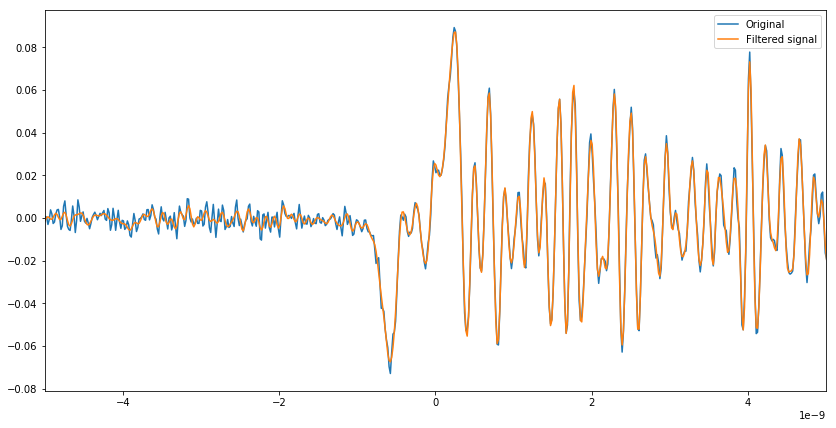

In [95]:
inv_fft =  fftpack.ifft(y_spectrum_filtered)

fig, ax = plt.subplots(1, figsize=(14,7))
ax.plot(data[0],data[1],label='Original')

ax.plot(data[0],inv_fft,label='Filtered signal')

ax.legend()
ax.set_xlim(-0.05e-7,0.05e-7)

In [96]:




# import datetime
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('multipage_pdf.pdf') as pdf:
    firstPage = plt.figure(figsize=(11.69,8.27))
    firstPage.clf()
    txt = 'This is the title page'
    firstPage.text(0.5,0.5,txt, transform=firstPage.transFigure, size=24, ha="center")
    pdf.savefig()
    plt.close()

    fig = plt.figure(figsize=(11.69,8.27))
    plt.plot([1,2,3], [1,3,2], label="col1")
    plt.plot([1,2,3],  [2,1,3], label="col2")
    plt.legend(loc='best')
    plt.grid(True)
    plt.title('Title')
    txt = 'this is an example'
    plt.text(0.05,0.95,txt, transform=fig.transFigure, size=24)
    pdf.savefig()
    plt.close()